In [7]:
# Data Collection Grade_
import pandas as pd
df = pd.read_csv("E:\\2021\\notes 2021\\phd_amity Classes_PCS107_AI and ML\\data set\\Grade_Set_1.csv")
df

#Knowledge discovery in databases (KDD) is the process of discovering useful knowledge from a collection of data



,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


In [9]:
?pd

In [4]:
# step -2
""" Stage 2 - Selection Phase """
""" Division of factors into 
independent variable (X)& 
response variable (Y)"""

df["Hours_Studied"]
"""Convert series to array"""
df.Hours_Studied.values     # indentation is required 
"""Convert independent factors from
            data frame to ndarray using numpy 
 import numpy as np
df.Hours_Studied[:, np.newaxis]


array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
"""Stage 2 - Selection """

# independent factors
X = df.Hours_Studied[:, np.newaxis]
# response variables
Y = df.Test_Grade.values
# Select independent factors on the basis
# of covariance and correlation
df.cov()       
""" Compute correlation of columns"""
df.corr()


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


In [8]:
""" Stage 3 - Preprocessing """
""" A.) Cleaning the data """
""" Using sklearn preprocessing library"""
from sklearn import preprocessing
""" 1.) Check for Null Values """
df.isnull()
""" 2.) If empty either remove or fill"""
""" Filling techniques: 
    a.) Fill with NA 
    b.) Fill with mean 
    c.) Fill with min
    d.) Fill with max"""
df["Hours_Studied"].fillna(value=df["Hours_Studied"].mean())
print(df["Hours_Studied"].mean())

""" B.) Preprocessing the categories """
""" Conversion of text data to numbers """
""" b1.) Binary category: yes / no"""
""" b2.) Classified category: 
        BTECH1 / BTECH2 / BTECH3 """

""" Methods are as follows: 
    a.) Label Binarizer : Binary
    b.) Label Encoding : Category (Manual)
    c.) One Hot Encoder : Category (Automated)"""


6.0


' Methods are as follows: \n    a.) Label Binarizer : Binary\n    b.) Label Encoding : Category (Manual)\n    c.) One Hot Encoder : Category (Automated)'

In [11]:
""" Stage 4 - Transformation """
"""Standardization and Normalization"""
""" Standardization = StandardScalar()"""
""" MinMax Scaling = MinMaxScalar()"""
# Standardization using Library 
scalar = preprocessing.StandardScaler().fit(X)
scalar.transform(X)
# Calculate standardization manually
mean = df.Hours_Studied.mean()
standard_deviation = df.Hours_Studied.std()
print("Mean is", mean)
print("Standard deviation is", 
      standard_deviation)
print((df.Hours_Studied - mean) / standard_deviation)



Mean is 6.0
Standard deviation is 2.7386127875258306
0   -1.460593
1   -1.095445
2   -0.730297
3   -0.365148
4    0.000000
5    0.365148
6    0.730297
7    1.095445
8    1.460593
Name: Hours_Studied, dtype: float64


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
""" 4b Normalization of Data """
normalizer = preprocessing.MinMaxScaler().fit(X)
X = normalizer.transform(X)
X

array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.625],
       [0.75 ],
       [0.875],
       [1.   ]])

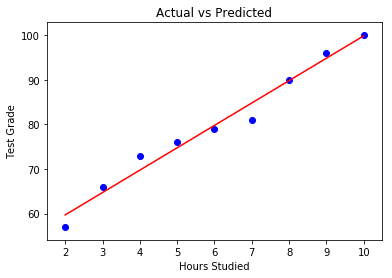

In [16]:
""" Stage 5 - Data Mining """
""" Check the response variable type """
""" Type = Quantitative / Number """
""" For quantitative response variable 
we use Linear Regression """
"""Linear Regression equation is:
Y = m * X + c 
Y = Response variable 
m = slope [deltaY / deltaX]
X = Independent Factor 
c = intercept [Value of Y when X = 0]
"""
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(x="Hours_Studied", 
        y="Test_Grade",
       kind="scatter", 
        title="Hours vs Marks")
import sklearn.linear_model as lm
lr = lm.LinearRegression()
X = df.Hours_Studied[:, np.newaxis]
Y = df.Test_Grade.values
lr.fit(X, Y)
""" Prediction of Test Grade """
Y_pred  = lr.predict(X)
""" Add predicted values to data frame
for comparison """
df["Predicted"] = Y_pred
df
"""Plot the Actual vs Predicted """
plt.scatter(X, Y, color="blue")
plt.plot(X, Y_pred, color="red")
plt.title("Actual vs Predicted")
plt.xlabel("Hours Studied")
plt.ylabel("Test Grade")

plt.show()



In [17]:
"""Print the coeff and intercept"""
print("Slope is ", lr.coef_)
print("Intercept is", lr.intercept_)
""" Manual implementation of Linear
Regression: Y = mX + c
"""
m = lr.coef_
c = lr.intercept_
"""Calculate Y when X = 7 """
X1 = 2
Y1 = m * X1 + c
print("Original value of Y ", df[0:1])
print("Predicted Value of Y when X = 7",Y1)



Slope is  [5.01666667]
Intercept is 49.67777777777776
Original value of Y     Hours_Studied  Test_Grade  Predicted
0              2          57  59.711111
Predicted Value of Y when X = 7 [59.71111111]


In [19]:
""" How good the model is ? """
""" Stage 6 - Evaluation / Interpretation 
According to SEMMA (Assess)
"""
""" To evaluate Linear Regression 
use the following techniques 
1.) Evaluate coefficient of determination
also known as R Squared Value 
Range (0 - 1)
Thumb Rule for good fit is :
r square > 0.8 
2.) Root Mean Squared Error : RMSE 
Lower the value, better the model
3.) Mean Absolute Error: MAE 
Lower the value, better the model 
"""
""" Manual Evaluation Process """
""" R squared = SSR / SST 
SSR = Sum of squared residual
SST = Sum of squared total
SSR = sum of square of y_pred - y_mean
SST = sum of square of y - y_mean
"""
# Compute Sum of Squared Residual 
sr = np.square(Y_pred - Y.mean())
ssr = sr.sum()
# Compute Sum of Squared Total
st = np.square(Y - Y.mean())
sst = st.sum()
sst
print("Sum of squared residual", ssr)
print("Sum of squared total", sst)
# Compute r squared: 
# coeff of determination
r_squared = ssr / sst 
print("Accuracy is", r_squared)
""" Compute rsquared using 
sklearn metrics """
from sklearn.metrics import r2_score
print("Accuracy is", r2_score(Y, Y_pred))  # error



Sum of squared residual 1510.0166666666673
Sum of squared total 1547.5555555555557
Accuracy is 0.9757431074095351
Accuracy is 0.9757431074095347


In [20]:
""" 2.) Root Mean Squared Error """    # performance metric mae,mse,rmse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error", mse)     # real data vs predicated data
print("Root Mean Squared Error", rmse)
""" 3.) Mean Absolute Error """
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, Y_pred)
print("Mean absolute error", mae)
# MAE : linear score, indivisual difrences are weighted equally 
# RMSE :quadratic score, high weigth to large errors
#MSE :how close a fitted line 
# RMSE=MAE.[RMSE]<=[MAE]


Mean Squared Error 4.170987654320986
Root Mean Squared Error 2.0422995995497297
Mean absolute error 1.618518518518523


   Hours_Studied  Test_Grade  Predicted     Degree2
0              2          57  59.711111   56.564103
1              3          66  64.727778   67.259907
2              4          73  69.744444   72.355478
3              5          76  74.761111   75.319347
4              6          79  79.777778   78.487179
5              7          81  84.794444   83.061772
6              8          90  89.811111   89.113054
7              9          96  94.827778   95.578089
8             10         100  99.844444  100.261072
Accuracy for Degree 1 0.9757431074095347
Accuracy for Degree 4 0.9946995135823395


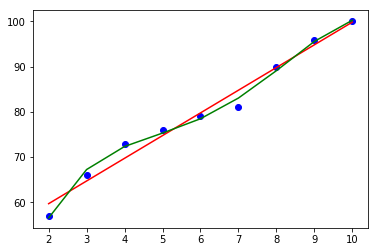

,Hours_Studied,Test_Grade,Predicted,Degree2
0,2,57,59.711111,56.564103
1,3,66,64.727778,67.259907
2,4,73,69.744444,72.355478
3,5,76,74.761111,75.319347
4,6,79,79.777778,78.487179
5,7,81,84.794444,83.061772
6,8,90,89.811111,89.113054
7,9,96,94.827778,95.578089
8,10,100,99.844444,100.261072


In [21]:
""" Stage 7 - Optimization 
and Performance Tuning """
""" Polynomial Regression """
""" Objective is to find the nth degree
where we can achieve highest accuracy
and above this degree, variation of 
accuracy is minimum """

"""Python offers polynomial features
for regression PolynomialFeatures"""
from sklearn import preprocessing
from sklearn import pipeline
deg = 4
pf = preprocessing.PolynomialFeatures(
    degree=deg)

""" Apply polynomial features on 
Linear Regression model using pipeline
"""
model = pipeline.make_pipeline(pf, lr)
model.fit(X, Y)                  # fit() 
Y_pred_2 = model.predict(X)     # predict()
df["Degree2"] = Y_pred_2
print(df)
print("Accuracy for Degree 1", 
      r2_score(Y, Y_pred))
print("Accuracy for Degree", 
      str(deg), r2_score(Y, Y_pred_2))
plt.scatter(X, Y, color="blue")
plt.plot(X, Y_pred, color= "red")
plt.plot(X, Y_pred_2, color="green")
plt.show()
df



In [8]:
?

Object `lableencoder` not found.
